In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top','Tourser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# 데이터 탐색

In [5]:
train_images.shape 

(60000, 28, 28)

In [6]:
len(train_labels) #훈련세트 6만개

60000

In [7]:
unique, counts = np.unique(train_labels, return_counts =True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

# 데이터 전처리

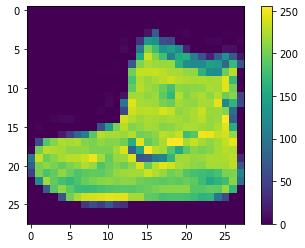

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [45]:
x_train= train_images.reshape(-1, 28, 28, 1).astype('float32') /255.0
x_test = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [46]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

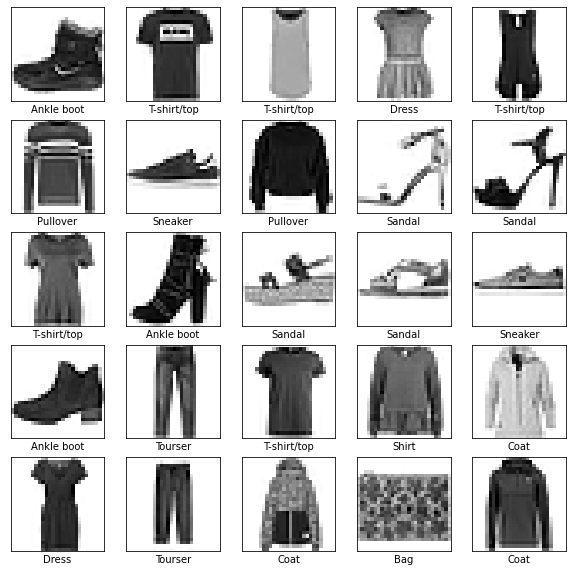

In [48]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

## - 층 설정

In [49]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation = 'relu'), #컨볼루션 층 생성
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'), 
    Dropout(0.5), #50% 노드를 끄는 것
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## - 모델 컴파일

In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
# 모델 최적화 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [52]:
modelpath = MODEL_DIR + 'fashion-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callbak = EarlyStopping(monitor='val_loss', patience=10)

# 모델 훈련

In [53]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size = 200, callbacks = [early_stopping_callbak, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.7815
Epoch 00001: val_loss improved from inf to 0.35882, saving model to ./model/fashion-cnn-01-0.3588.hdf5
60000/60000 [==============================] - 45s 746us/sample - loss: 0.6132 - accuracy: 0.7817 - val_loss: 0.3588 - val_accuracy: 0.8704
Epoch 2/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8674
Epoch 00002: val_loss improved from 0.35882 to 0.30826, saving model to ./model/fashion-cnn-02-0.3083.hdf5
60000/60000 [==============================] - 43s 724us/sample - loss: 0.3750 - accuracy: 0.8672 - val_loss: 0.3083 - val_accuracy: 0.8875
Epoch 3/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.3198 - accuracy: 0.8850
Epoch 00003: val_loss improved from 0.30826 to 0.29002, saving model to ./model/fashion-cnn-03-0.2900.hdf5
60000/60000 [==============================] - 44s 73

59800/60000 [============================>.] - ETA: 0s - loss: 0.0901 - accuracy: 0.9646
Epoch 00027: val_loss did not improve from 0.20875
60000/60000 [==============================] - 44s 741us/sample - loss: 0.0900 - accuracy: 0.9647 - val_loss: 0.2525 - val_accuracy: 0.9288


# 정확도 평가

In [62]:
from tensorflow.keras.models import load_model
del model

NameError: name 'model' is not defined

In [63]:
model = load_model('model/fashion-cnn-17-0.2087.hdf5')

In [65]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9290


# 예측 만들기

In [66]:
predictions = model.predict(x_test)

In [67]:
predictions[0]

array([1.0445788e-13, 9.8861251e-13, 9.9157878e-14, 6.0731434e-11,
       8.6466346e-12, 1.0939068e-07, 1.6109355e-12, 6.1622791e-07,
       1.0366599e-12, 9.9999928e-01], dtype=float32)

In [68]:
np.argmax(predictions[0]) # max값을 가진얘의 인덱스 값을 꺼내줌

9

In [69]:
test_labels[0]

9